# Домашняя работа №8
# Студент: Правилов Михаил

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Есть уравнение ЗШЛ: $-\phi''(r) + l(l+1)r^{-2}\phi(r) - 2r^{-1}\phi(r) = 2E_{nl}\phi(r)$, $\phi(0) = \phi(\infty) = 0$

Перепишем его, сделав замену и приведя к виду, схожему с тем, что был на лекции:

$\lambda = -2E_{nl} = -2 * \frac{-1}{2 * (n +l+1)^2} = \frac{1}{(n + l + 1)^2}$

$\phi''(r) - (l(l+1)r^{-2} - 2r^{-1})\phi(r) = \lambda\phi(r)$

$\phi''(r) - p(r)\phi(r) = \lambda\rho(r)\phi(r)$

Где $p(r) = l(l+1)r^{-2} - 2r^{-1}, \rho(r) = 1$

$\phi(0) = \phi(R) = 0$

Используйте сеточкую аапроксимацию второго порядка для решения данной ЗШЛ. 

(Спектр матрицы можно найти с помощью библеотечных функций)

Вычислите 5 первых с.з. для $l = 0$ с точностью $\epsilon = 10^{-5}$

(Начните высиления со значения R = 10)

Постройте первые 5 собственных функций

Для этого надо построить матрицу и найти ее спектр.

In [4]:
def rho(x):
    return 1

def p(x, l):
    return l * (l + 1) * x ** (-2) - 2 * x ** (-1)

def get_matrix(l, R, N):
    h = R / N
    rhos = [rho(i * h) for i in range(1, N)]
    ps = [p(i * h, l) for i in range(1, N)]
    A = np.zeros((N - 1, N - 1))
    for i in range(0, N - 1):
        if i != 0:
            A[i][i - 1] = 1 / h ** 2
        A[i][i] = - (2 / h ** 2 + ps[i])
        if i != N - 2:
            A[i][i + 1] = 1 / h ** 2
    return -A

С лекции мы знаем, что сходимость сеточных методов это $O(h^2)$, значит чтобы погрешность была порядка $10^{-5}$, надо решить:

$h^2 = 10^{-5} <=> h = 10^{-2.5} <=> R / N = 10^{-2.5} <=> N = 10^{2.5} * R$

Если R = 10, то $N = 10^{3.5}$ 

Поэтому возьмем $N = 4000$

In [ ]:
R = 10
A = get_matrix(0, R, 1000)
eig = np.linalg.eig(A)
spectrum = eig[0]
eig_vectors = eig[1]

indexes = np.argsort(spectrum)[:5]
print("5 первых собственных значений")
print(spectrum[indexes])
print("---")
print("5 первых собственных функций")
print(eig_vectors[indexes])

In [69]:
def draw_eig_func(data, R):
    N = (len(data) + 1)
    h = R / N
    data_y = np.zeros(N + 1)
    data_y[1:N] += data
    data_x = [i * h for i in range(N + 1)]
    plt.subplot(211)
    plt.plot(data_x, data_y)
    plt.ylabel("eigen function(N)")
    plt.xlabel("N")

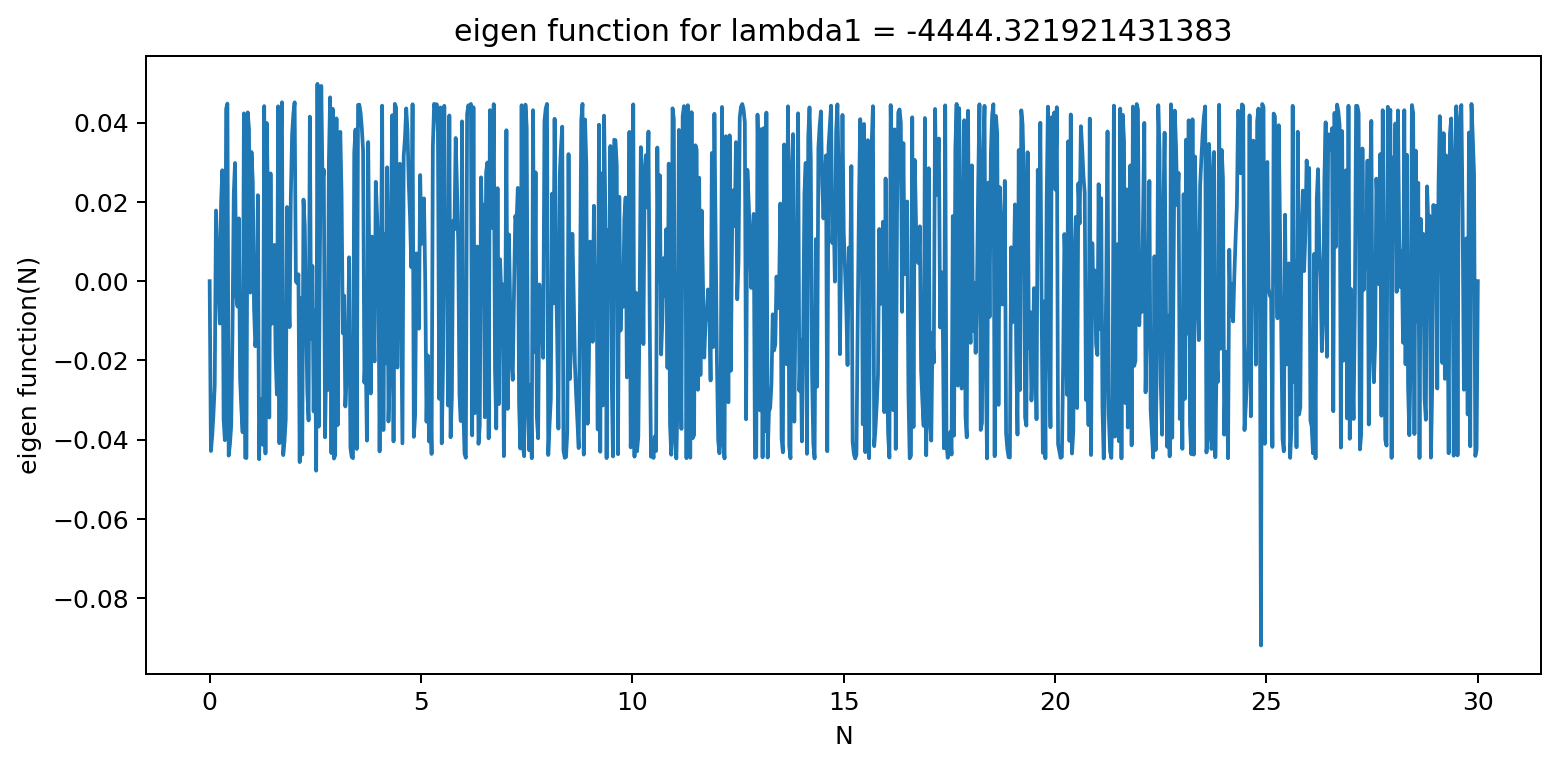

In [70]:
plt.figure(figsize=(10, 10), dpi=180)
draw_eig_func(eig_vectors[indexes][0], R)
plt.title("eigen function for lambda1 = " + str(spectrum[indexes][0]))
plt.show()

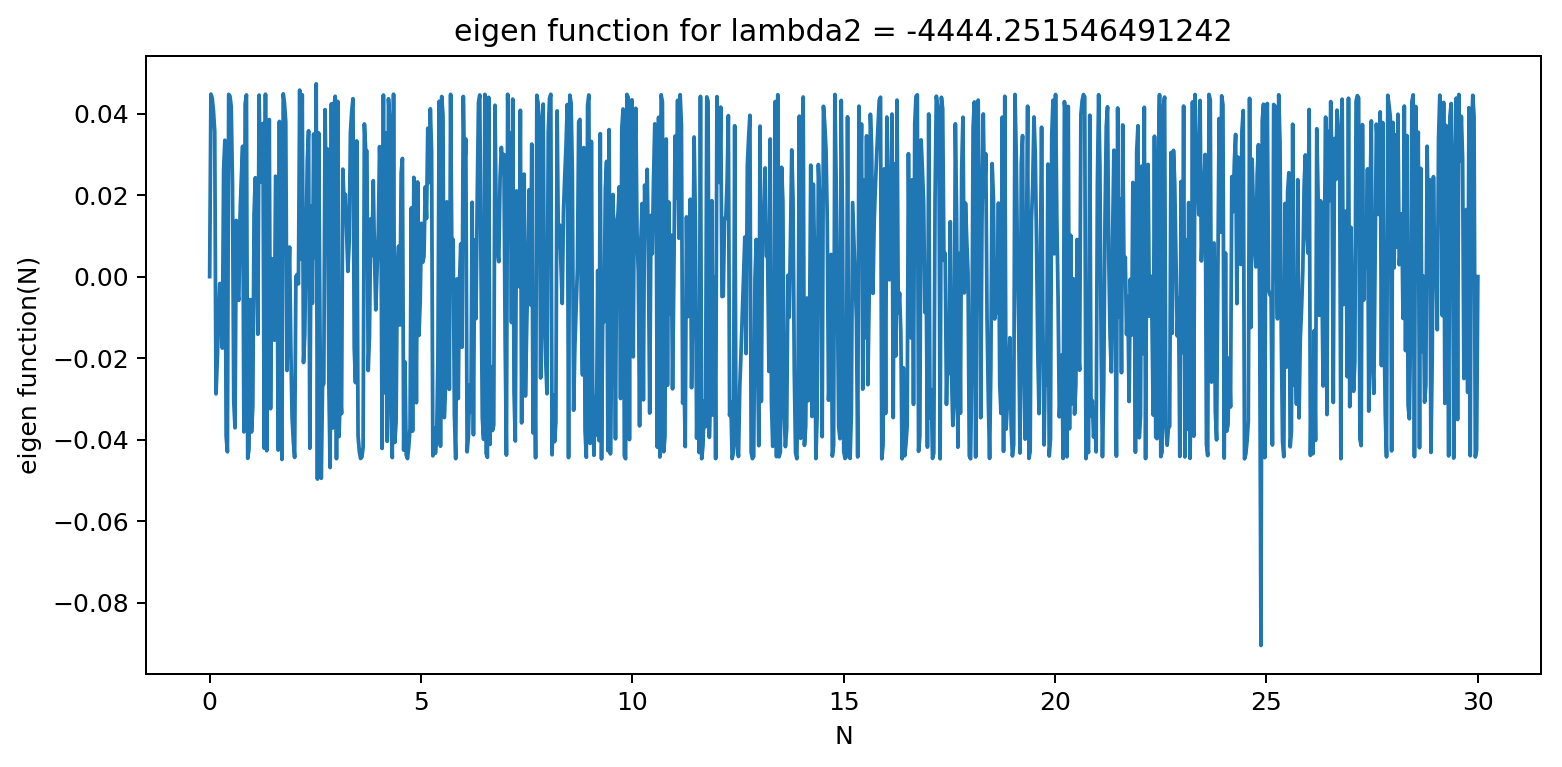

In [71]:
plt.figure(figsize=(10, 10), dpi=180)
draw_eig_func(eig_vectors[indexes][1], R)
plt.title("eigen function for lambda2 = " + str(spectrum[indexes][1]))
plt.show()

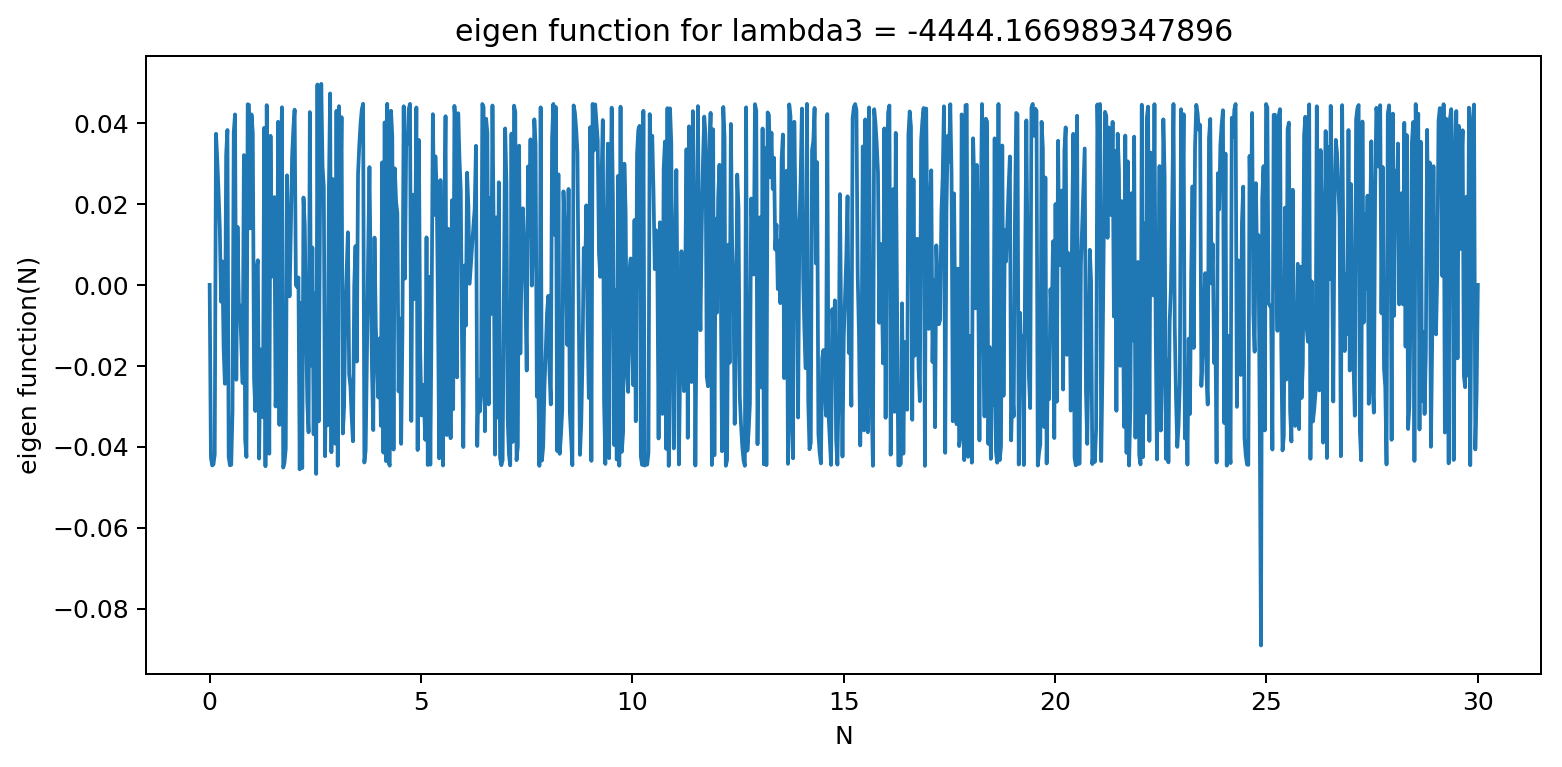

In [72]:
plt.figure(figsize=(10, 10), dpi=180)
draw_eig_func(eig_vectors[indexes][2], R)
plt.title("eigen function for lambda3 = " + str(spectrum[indexes][2]))
plt.show()

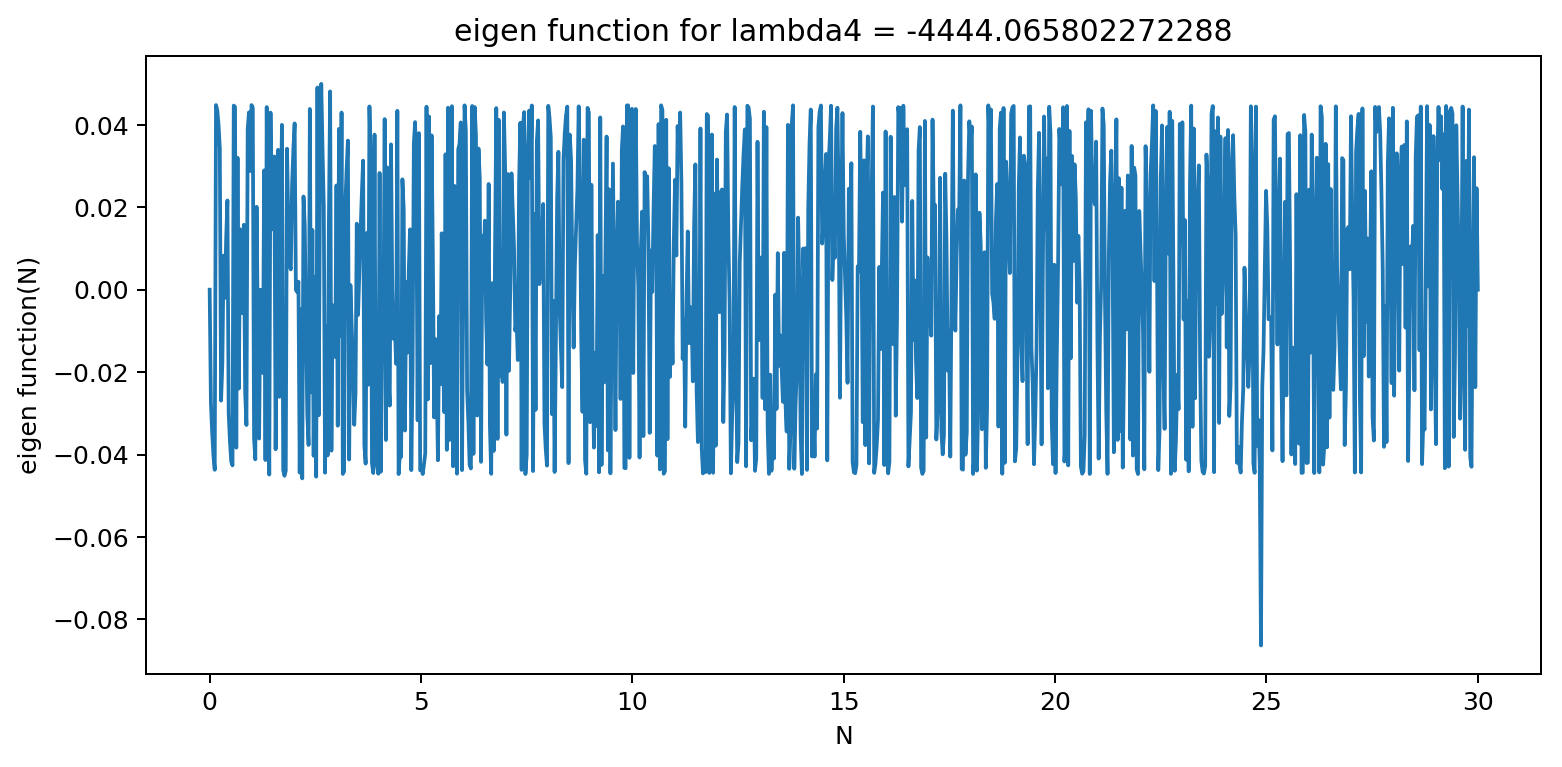

In [73]:
plt.figure(figsize=(10, 10), dpi=180)
draw_eig_func(eig_vectors[indexes][3], R)
plt.title("eigen function for lambda4 = " + str(spectrum[indexes][3]))
plt.show()

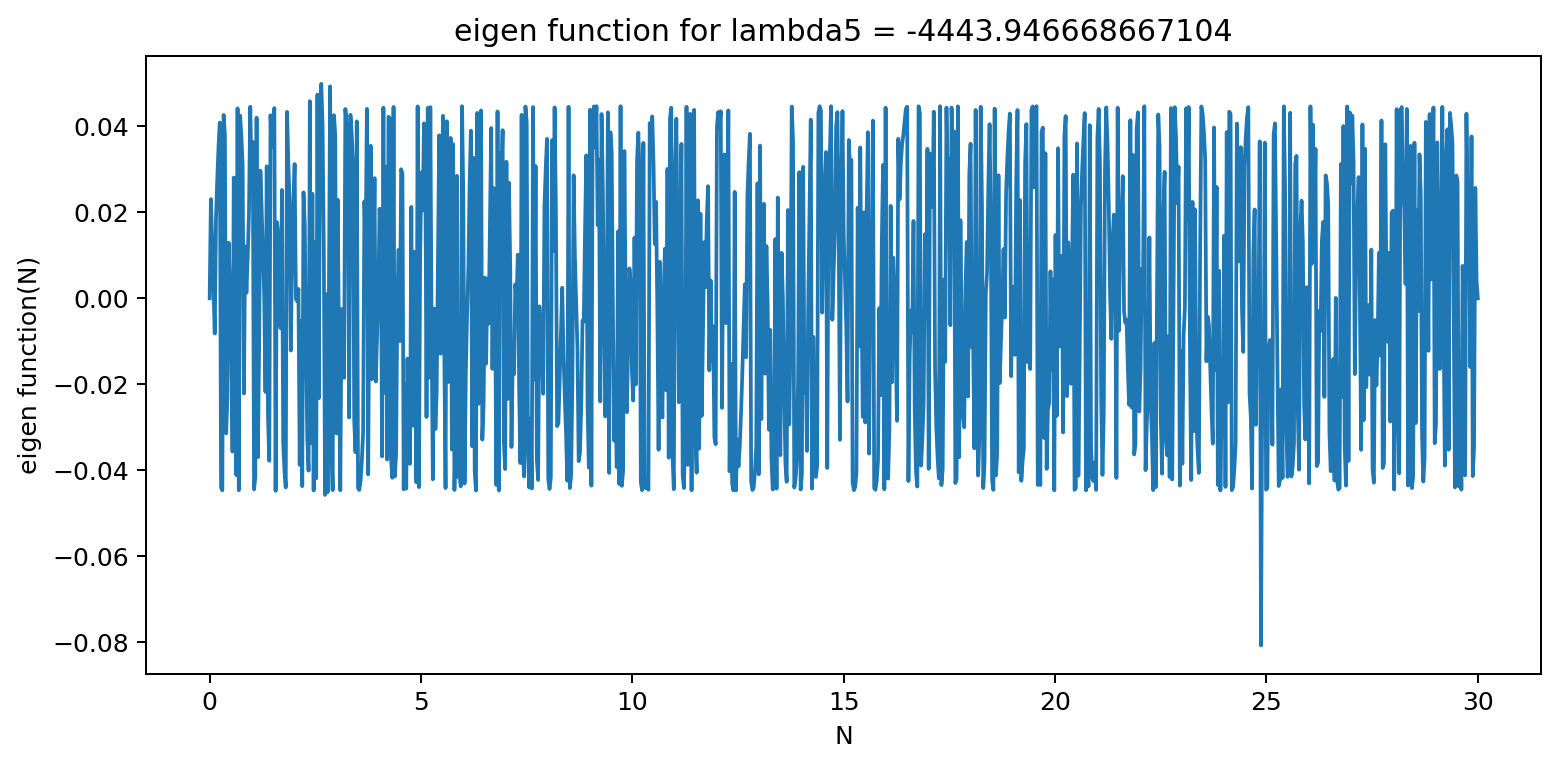

In [75]:
plt.figure(figsize=(10, 10), dpi=180)
draw_eig_func(eig_vectors[indexes][4], R)
plt.title("eigen function for lambda5 = " + str(spectrum[indexes][4]))
plt.show()

Графики для разных собственных чисел похожи, очень колеблющиеся. Возможно это какая-то переодическая функция.

In [123]:
def get_A_numerov(l, R, N):
    h = R / N
    rhos = [rho(i * h) for i in range(1, N)]
    ps = [p(i * h, l) for i in range(1, N)]
    A = np.zeros((N - 1, N - 1))
    for i in range(0, N - 1):
        if i != 0:
            A[i][i - 1] = 1 / h ** 4 - 1 / 12 * ps[i - 1] / h ** 2
        A[i][i] = - (2 / h ** 4 + ps[i] - 1 / 6 * ps[i] / h ** 2)
        if i != N - 2:
            A[i][i + 1] = 1 / h ** 4 - 1 / 12 * ps[i + 1] / h ** 2
    return A

def get_B_numerov(l, R, N):
    h = R / N
    rhos = [rho(i * h) for i in range(1, N)]
    B = np.zeros((N - 1, N - 1))
    for i in range(0, N - 1):
        if i != 0:
            B[i][i - 1] = rhos[i - 1] / h ** 2 / 12
        B[i][i] = rhos[i] - 1/ 6 * rhos[i] / h ** 2
        if i != N - 2:
            B[i][i + 1] = rhos[i + 1] / h ** 2 / 12
    return B

def get_matrix_numerov(l, R, N):
    return np.matmul(get_A_numerov(l, R, N), np.linalg.inv(get_B_numerov(l, R, N)))

In [124]:
def get_first_5(A):
    return np.sort(np.linalg.eig(A)[0])[:5]

def draw_error(method, R, N_min, N_max):
    real = [-1 / (2 * (n + 1) ** 2) for n in range(5)]
    data_x = [i for i in range(N_min, N_max + 1)]
    data_y = []
    for N in range(N_min, N_max + 1):
        matrix = method(0, R, N)
        data_y.append(max(abs(get_first_5(matrix) - real)))
    plt.subplot(211)
    plt.plot(data_x, data_y)
    plt.ylabel("max error")
    plt.xlabel("N")

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


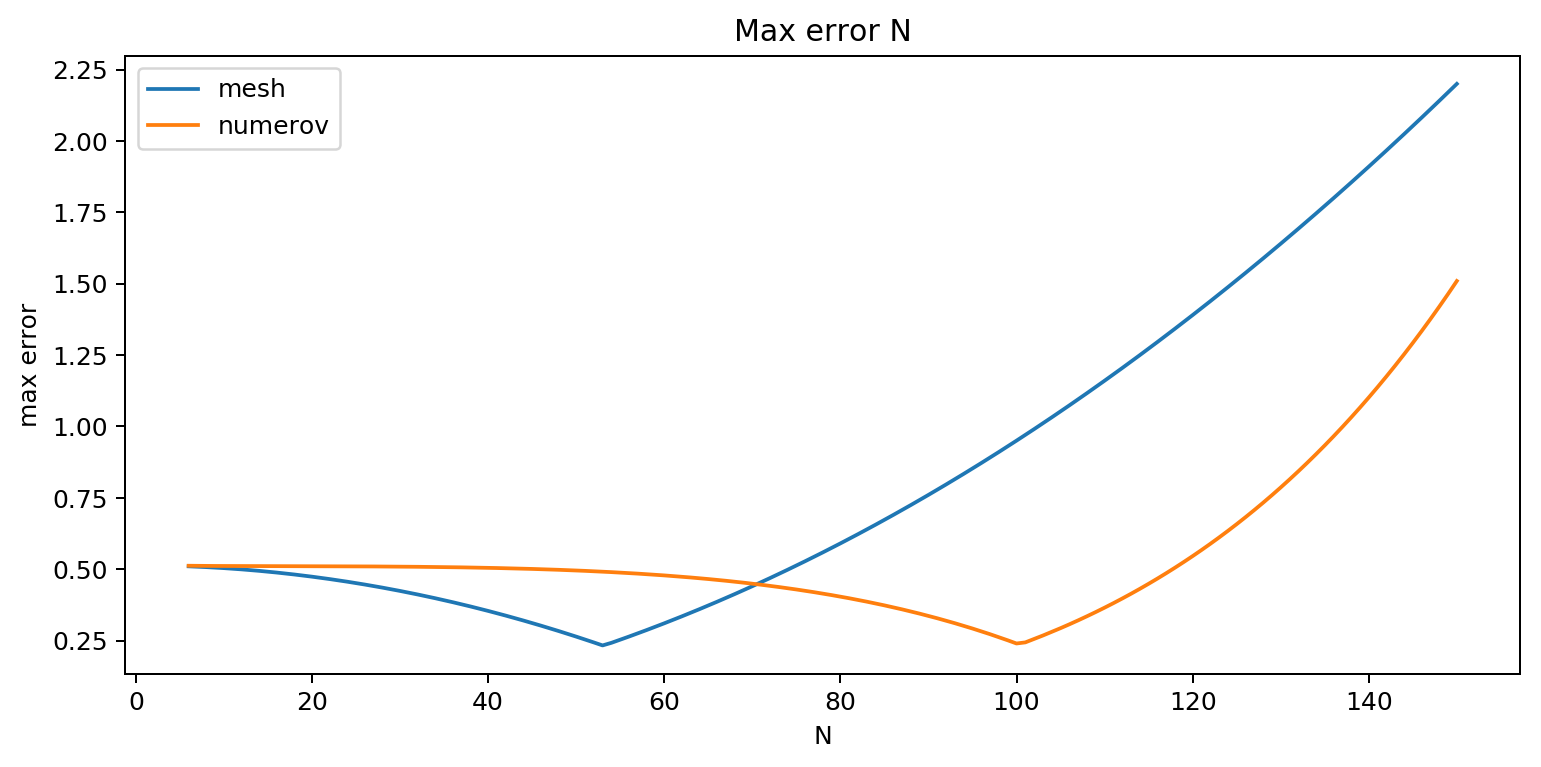

In [129]:
plt.figure(figsize=(10, 10), dpi=180)
R = 200
N_min = 6
N_max = 150
draw_error(get_matrix, R, N_min, N_max)
draw_error(get_matrix_numerov, R, N_min, N_max)
plt.title("Max error N")
plt.legend(("mesh", "numerov"))
plt.show()

Для более менее адевкватной ошибки пришлось увеличить R. Видим, что Нумеров справляется при больших N чуть лучше.